<h2> <center> Data Visualization

________

In [2]:
# let import some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)


In [3]:
#load the Iris flower dataset
data =pd.read_csv('/content/Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.Species.value_counts() #how many number of example in each flower species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

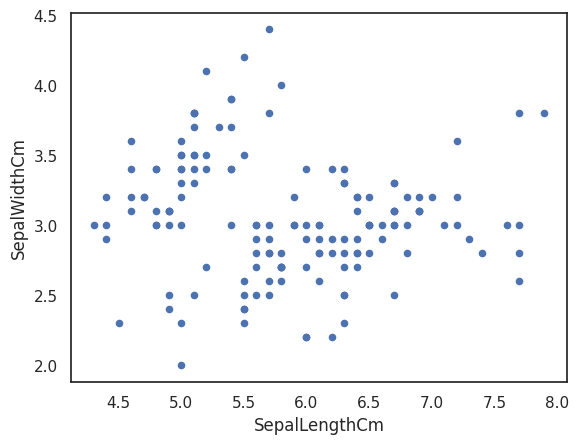

In [8]:
data.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter");

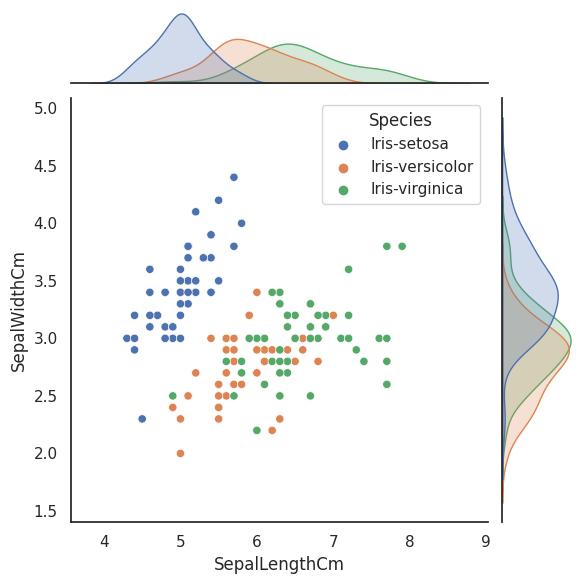

In [44]:
#let use seaborn
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm", data=data,hue = "Species");

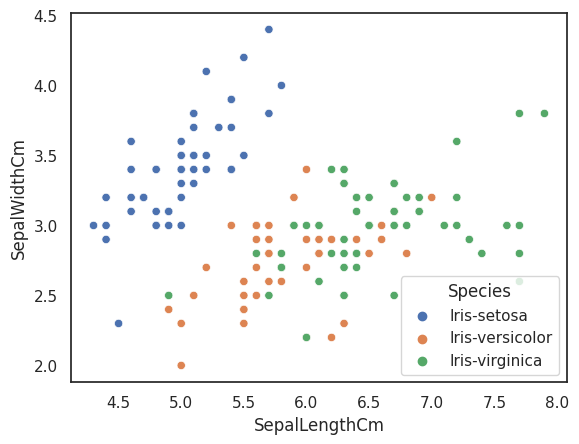

In [16]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=data,hue="Species");

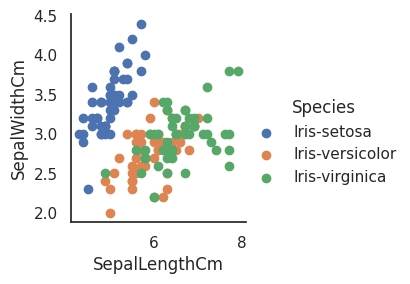

In [24]:
#we can also use FaceGrid to plot same plot
sns.FacetGrid(data, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

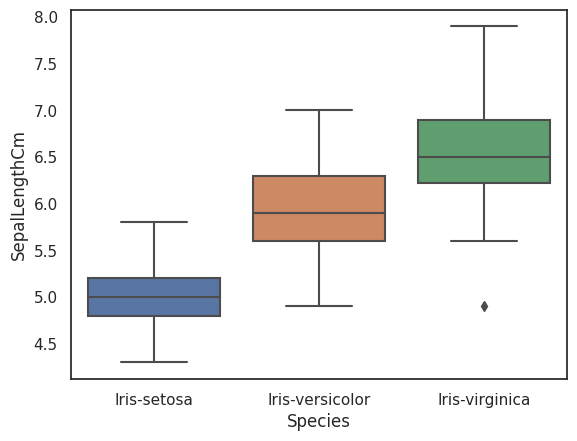

In [26]:
#Now let investigate each specy individually
sns.boxplot(x="Species",y="SepalLengthCm",data=data);

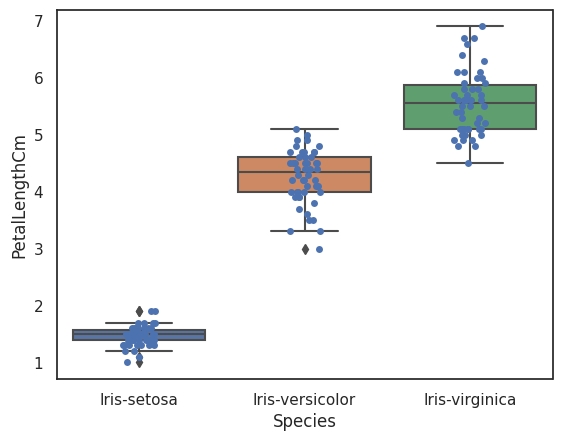

In [29]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=data)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray");

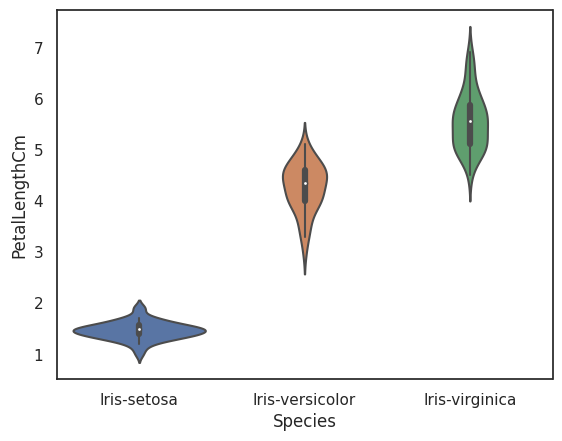

In [31]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=data, size=8);

<Figure size 2000x1500 with 0 Axes>

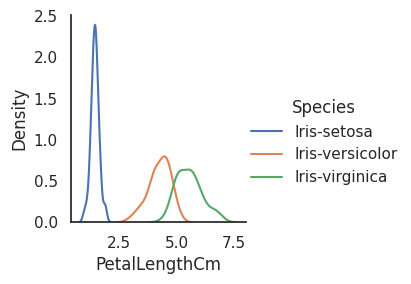

In [35]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
plt.figure(figsize=(20, 15))
sns.FacetGrid(data, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend();

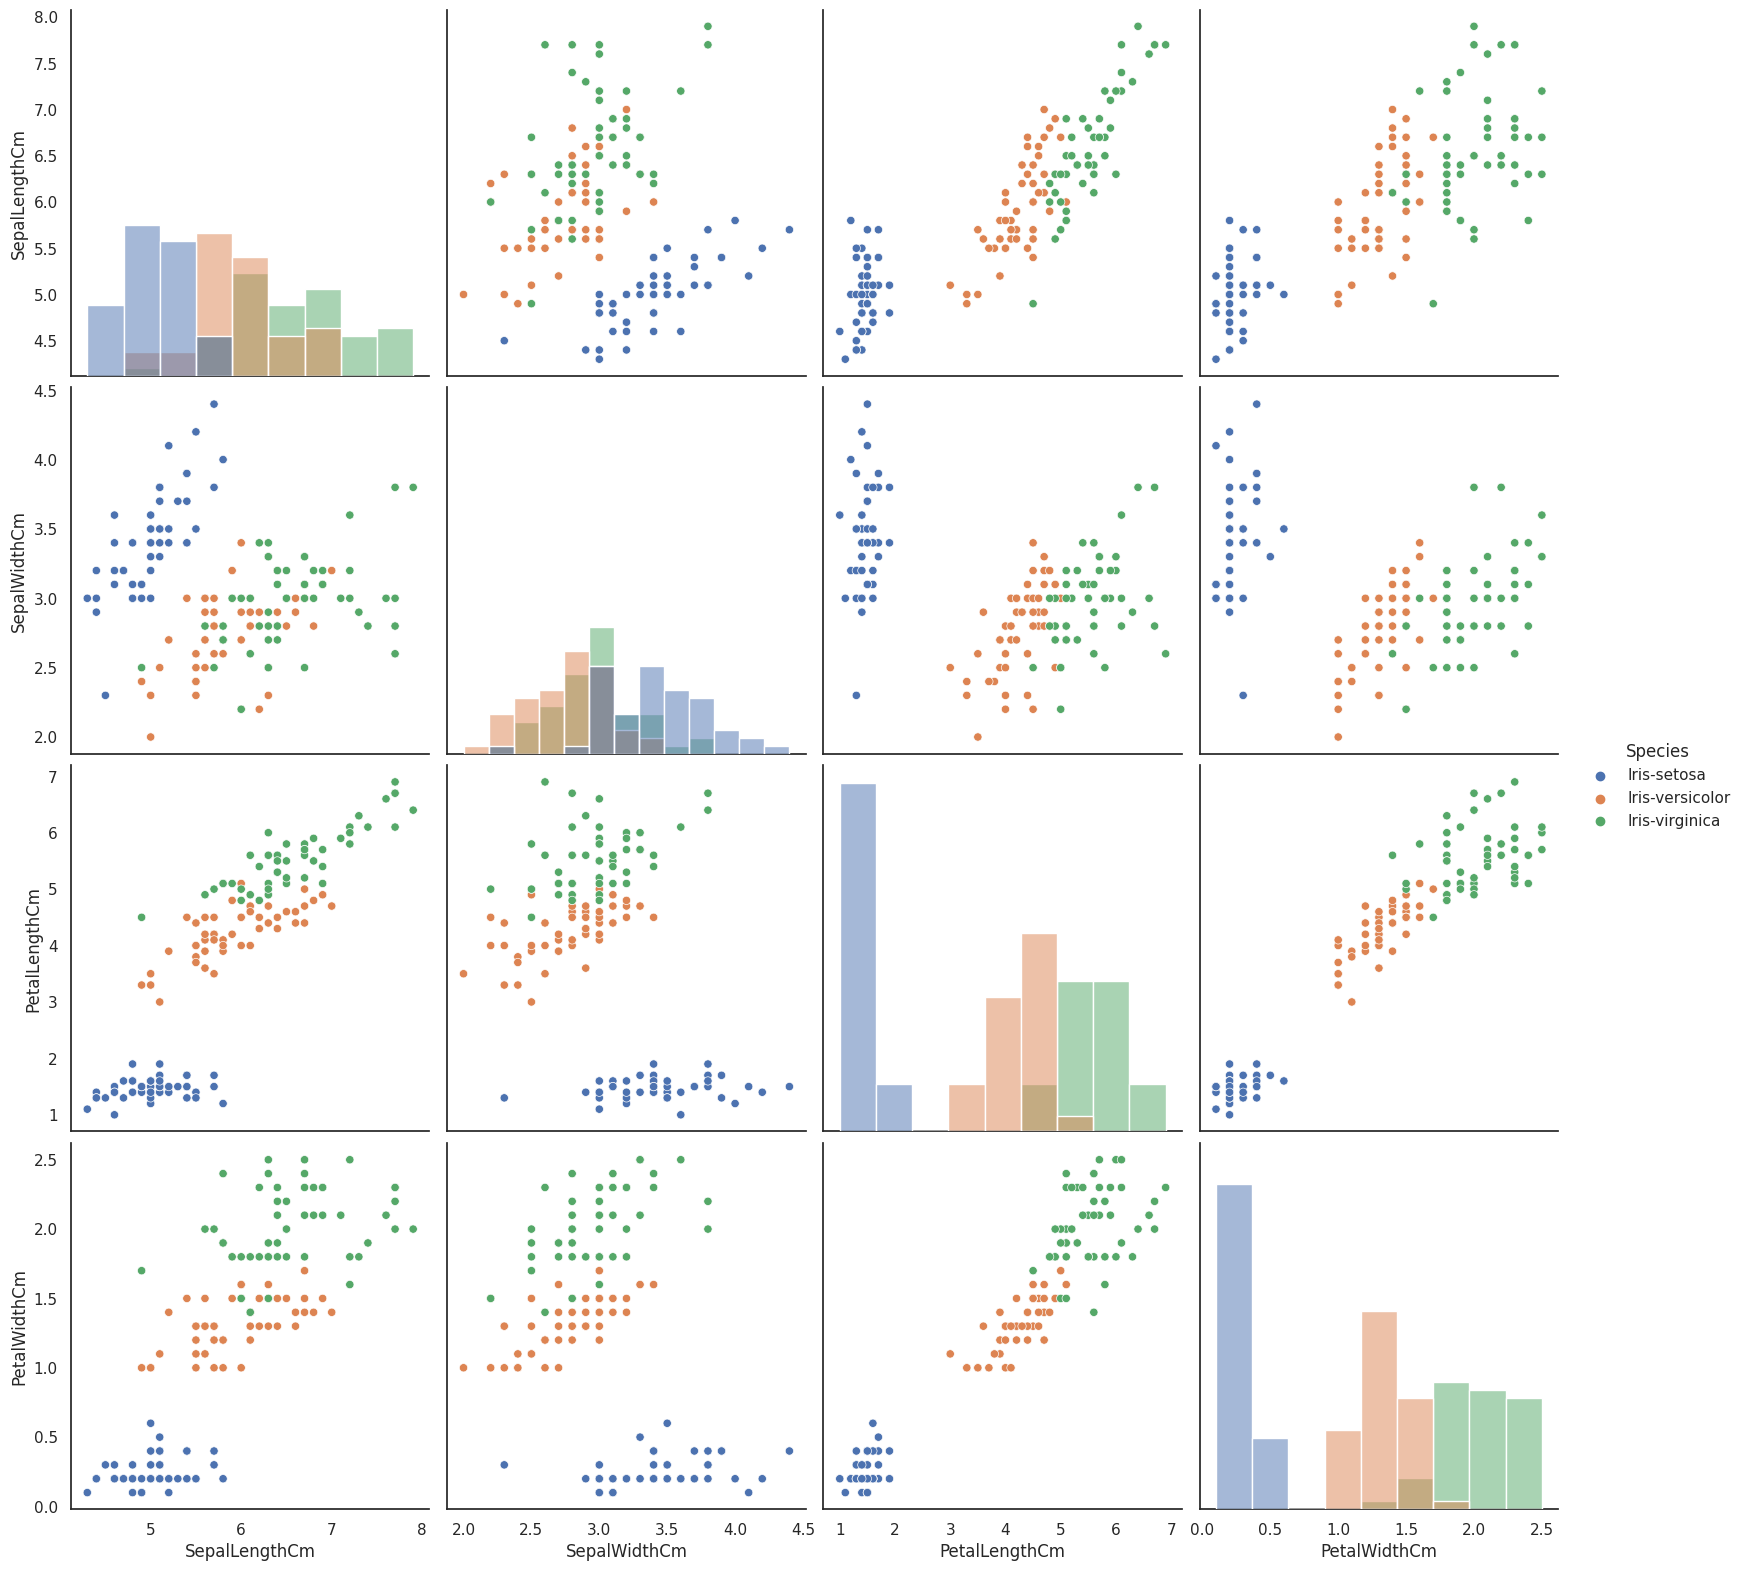

In [37]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=4,diag_kind='hist');

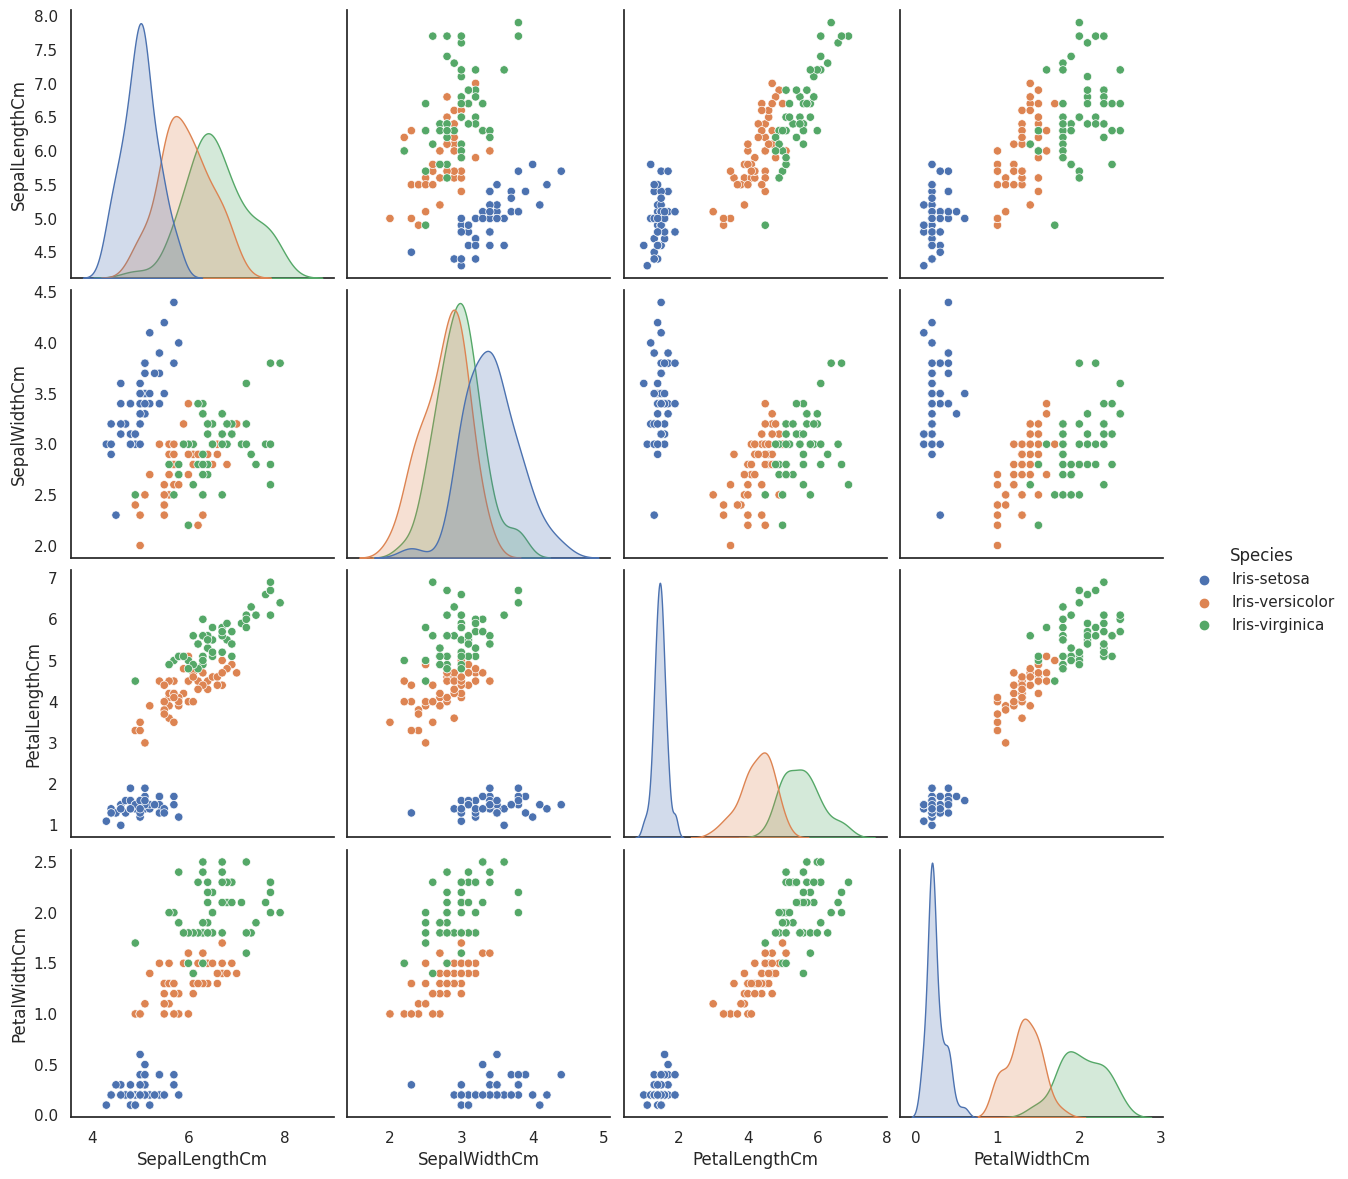

In [39]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations using kde plot
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3);

<Axes: >

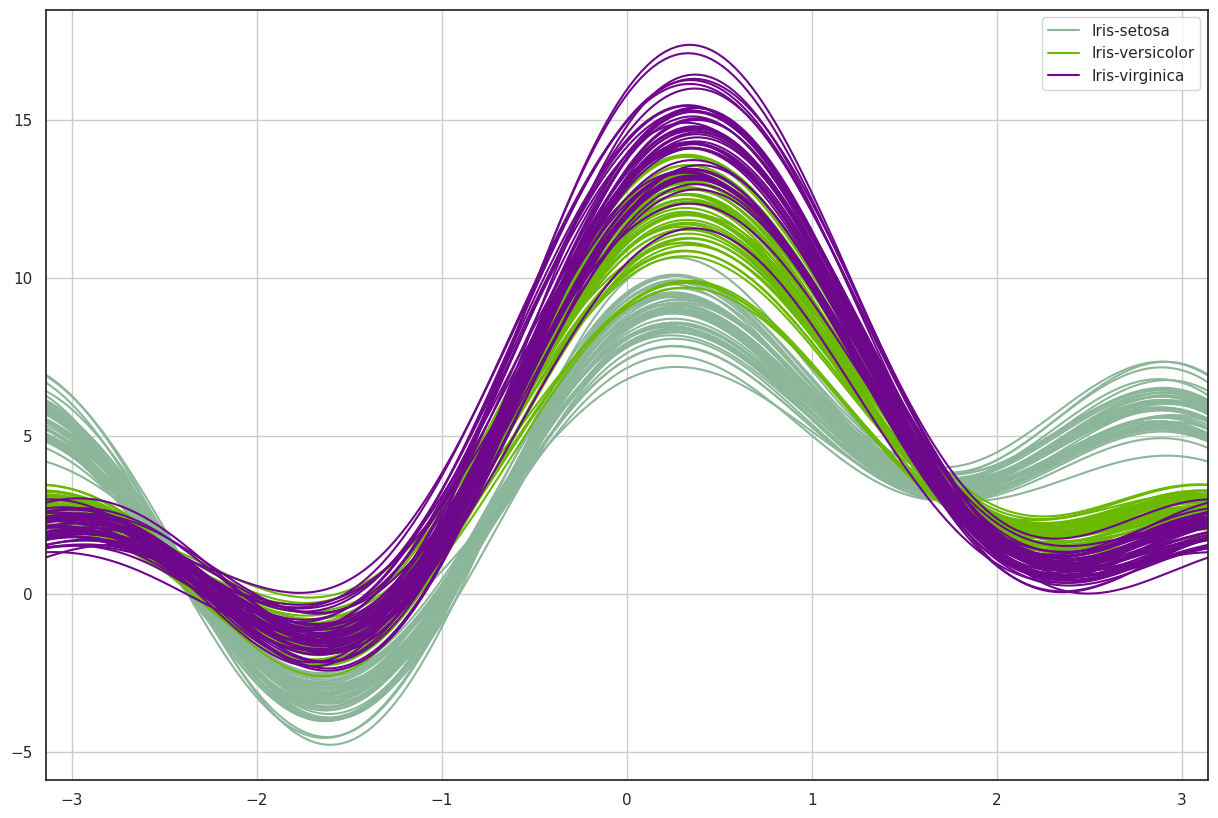

In [43]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(data.drop("Id", axis=1), "Species")